# Cleaning Data in Python

## Exploring Your Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
from glob import glob
import re

In [19]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 300)
pd.set_option('display.expand_frame_repr', True)

### Loading and viewing your data

In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the .head() and .tail() methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The .shape and .columns attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, df_subset, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

Data can be downloaded from here:
https://data.cityofnewyork.us/Housing-Development/DOB-Job-Application-Filings/ic3t-wcy2/data

In [20]:
# Read the file into a DataFrame: df

# df = pd.read_csv('data/dob_job_application_filings_subset.csv')

df = pd.read_csv('data/DOB_Job_Application_Filings_half.csv') # 1 gb so might use subset above for example


# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5,6,14,20,21,27,38,59,60,68,74,75,76,77,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


       Job #  Doc #   Borough House #    Street Name Block Lot    Bin #  \
0  302305743      1  BROOKLYN   1308A  MYRTLE AVENUE  3255  17  3398034   
1  302305752      1  BROOKLYN    1310  MYRTLE AVENUE  3255  17  3398034   
2  302312263      1  BROOKLYN    1308  MYRTLE AVENUE  3255  16  3398034   
3  302313878      1  BROOKLYN    1308  MYRTLE AVENUE  3255  16  3398034   
4  302322653      1  BROOKLYN     502      86 STREET  6051  17  3329007   

  Job Type Job Status                Job Status Descrp Latest Action Date  \
0       NB          P             PLAN EXAM - APPROVED         04/17/2007   
1       NB          P             PLAN EXAM - APPROVED         04/17/2007   
2       NB          P             PLAN EXAM - APPROVED         04/16/2007   
3       A3          R  PERMIT ISSUED - ENTIRE JOB/WORK         04/05/2007   
4       A2          X                       SIGNED OFF         07/26/2007   

  Building Type  Community - Board Cluster Landmarked Adult Estab Loft Board  \
0  1-2

In [4]:
# Create Subset
df_subset = df.loc[(df['Pre- Filing Date'] == '01/22/2017')].copy()

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

Empty DataFrame
Columns: [Job #, Doc #, Borough, House #, Street Name, Block, Lot, Bin #, Job Type, Job Status, Job Status Descrp, Latest Action Date, Building Type, Community - Board, Cluster, Landmarked, Adult Estab, Loft Board, City Owned, Little e, PC Filed, eFiling Filed, Plumbing, Mechanical, Boiler, Fuel Burning, Fuel Storage, Standpipe, Sprinkler, Fire Alarm, Equipment, Fire Suppression, Curb Cut, Other, Other Description, Applicant's First Name, Applicant's Last Name, Applicant Professional Title, Applicant License #, Professional Cert, Pre- Filing Date, Paid, Fully Paid, Assigned, Approved, Fully Permitted, Initial Cost, Total Est. Fee, Fee Status, Existing Zoning Sqft, Proposed Zoning Sqft, Horizontal Enlrgmt, Vertical Enlrgmt, Enlargement SQ Footage, Street Frontage, ExistingNo. of Stories, Proposed No. of Stories, Existing Height, Proposed Height, Existing Dwelling Units, Proposed Dwelling Units, Existing Occupancy, Proposed Occupancy, Site Fill, Zoning Dist1, Zoning Dist2

### Further diagnosis

In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful .info() method.

The .info() method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the 'Initial Cost' and 'Total Est. Fee' columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

The full DataFrame df and the subset DataFrame df_subset have been pre-loaded. Your task is to use the .info() method on these and analyze the results.

In [14]:
print(len(df))
print(len(df_subset))

# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())

672921
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672921 entries, 0 to 672920
Data columns (total 96 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Job #                          672921 non-null  int64  
 1   Doc #                          672921 non-null  int64  
 2   Borough                        672921 non-null  object 
 3   House #                        672915 non-null  object 
 4   Street Name                    672915 non-null  object 
 5   Block                          672566 non-null  object 
 6   Lot                            672562 non-null  object 
 7   Bin #                          672921 non-null  int64  
 8   Job Type                       672921 non-null  object 
 9   Job Status                     672921 non-null  object 
 10  Job Status Descrp              672921 non-null  object 
 11  Latest Action Date             672921 non-null  object 
 12  Building Type        

Excellent! Notice that the columns 'Initial Cost' and 'Total Est. Fee' are of type object. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. You saw in the previous exercise that there are also a lot of 0 values. Given the amount of data that is missing in the full dataset, it's highly likely that these 0 values represent missing data.

### Calculating summary statistics

You'll now use the .describe() method to calculate summary statistics of your data.

In this exercise, the columns 'Initial Cost' and 'Total Est. Fee' have been cleaned up for you. That is, the dollar sign has been removed and they have been converted into two new numeric columns: initial_cost and total_est_fee. You'll learn how to do this yourself in later chapters. It's also worth noting that some columns such as Job # are encoded as numeric columns, but it does not make sense to compute summary statistics for such columns.

This cleaned DataFrame has been pre-loaded as df. Your job is to use the .describe() method on it in the IPython Shell and select the statement below that is False.

In [15]:
df_subset['Initial Cost'] = df_subset['Initial Cost'].str.replace(',', '')
df_subset['Total Est. Fee'] = df_subset['Total Est. Fee'].str.replace(',', '')

AttributeError: Can only use .str accessor with string values!

In [7]:
df_subset['Initial Cost'] = df_subset['Initial Cost'].str.replace('$', '').astype('float')
df_subset['Total Est. Fee'] = df_subset['Total Est. Fee'].str.replace('$', '').astype('float')

/var/folders/sd/1vc_q83x5rn9jjrd0x47_cc00000gn/T/ipykernel_55271/413376214.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_subset['Initial Cost'] = df_subset['Initial Cost'].str.replace('$', '').astype('float')
/var/folders/sd/1vc_q83x5rn9jjrd0x47_cc00000gn/T/ipykernel_55271/413376214.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_subset['Total Est. Fee'] = df_subset['Total Est. Fee'].str.replace('$', '').astype('float')


In [8]:
df_subset['Initial Cost']

Series([], Name: Initial Cost, dtype: float64)

In [9]:
df_subset['Total Est. Fee']

Series([], Name: Total Est. Fee, dtype: float64)

In [10]:
df_subset.describe()

,Job #,Doc #,Bin #,Community - Board,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Zip,JOB_S1_NO,TOTAL_CONSTRUCTION_FLOOR_AREA,WITHDRAWAL_FLAG,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Frequency counts for categorical data

As you've seen, .describe() can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the .value_counts() method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called dropna which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to False so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the 'Borough', 'State', and 'Site Fill' columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the 'State' column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

In [11]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

QUEENS           221047
MANHATTAN        205682
BROOKLYN         144457
STATEN ISLAND     63669
BRONX             38066
Name: Borough, dtype: int64


In [12]:
# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

NaN    671944
NY        955
NJ         11
CA          3
CT          3
MD          1
MA          1
KY          1
VA          1
MO          1
Name: State, dtype: int64


In [31]:
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE         261449
NONE                   190214
NaN                    143425
ON-SITE                 47942
OFF-SITE                21894
USE UNDER 300 CU.YD      7997
Name: Site Fill, dtype: int64


Fantastic work! Notice how not all values in the 'State' column are NY. This is an interesting find, as this data is supposed to consist of applications filed in NYC. Curiously, all the 'Borough' values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the 'Site Fill' column, you may or may not need to recode the NOT APPLICABLE values to NaN in your final analysis.

### Visualizing single variables with histograms

Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is 'Existing Zoning Sqft'.

The .plot() method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - kind='hist', for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the 'Existing Zoning Sqft' column using the .describe() method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments logx=True or logy=True can be passed in to .plot() depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

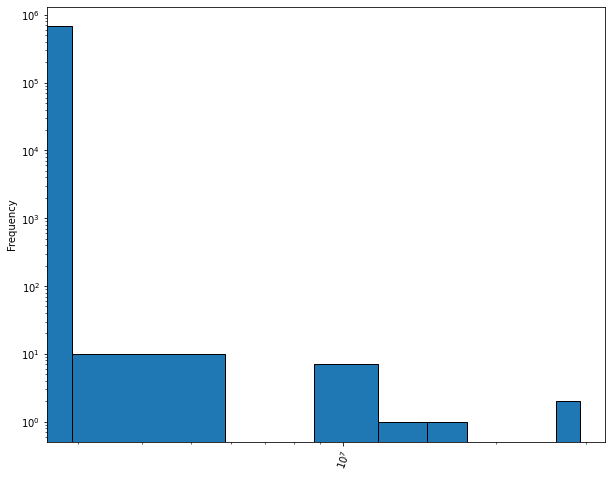

In [32]:
# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True, figsize=(10, 8), edgecolor='black')

# Display the histogram
plt.show()

Excellent work! While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.

### Visualizing multiple variables with boxplots

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a boxplot to compare the 'initial_cost' across the different values of the 'Borough' column. The pandas .boxplot() method is a quick way to do this, in which you have to specify the column and by parameters. Here, you want to visualize how 'initial_cost' varies by 'Borough'.

pandas and matplotlib.pyplot have been imported for you as pd and plt, respectively, and the DataFrame has been pre-loaded as df.

In [33]:
df['initial_cost'] = df['Initial Cost'].str.replace(',', '')
df['total_est_fee'] = df['Total Est. Fee'].str.replace(',', '')
df['initial_cost'] = df['Initial Cost'].str.replace('$', '').astype('float')
df['total_est_fee'] = df['Total Est. Fee'].str.replace('$', '').astype('float')

/var/folders/sd/1vc_q83x5rn9jjrd0x47_cc00000gn/T/ipykernel_53869/662981272.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['initial_cost'] = df['Initial Cost'].str.replace('$', '').astype('float')
/var/folders/sd/1vc_q83x5rn9jjrd0x47_cc00000gn/T/ipykernel_53869/662981272.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_est_fee'] = df['Total Est. Fee'].str.replace('$', '').astype('float')


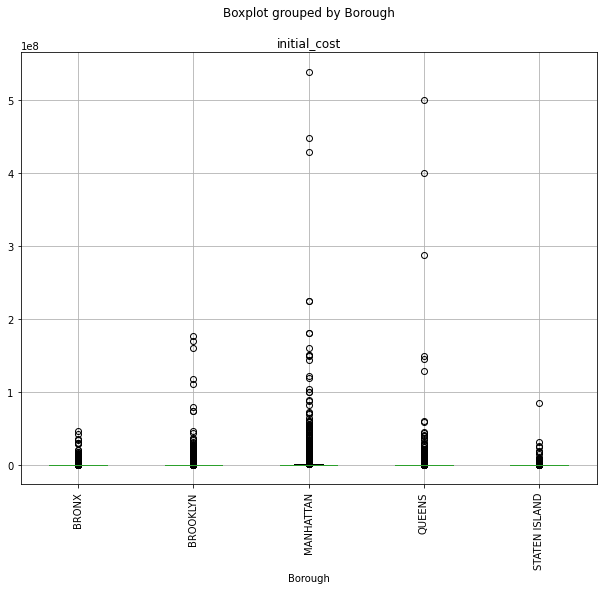

In [34]:
# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90, figsize=(10, 8))

# Display the plot
plt.show()

Great work! You can see the 2 extreme outliers are in the borough of Manhattan. An initial guess could be that since land in Manhattan is extremely expensive, these outliers may be valid data points. Again, further investigation is needed to determine whether or not you can drop or keep those points in your data.

### Visualizing multiple variables with scatter plots

Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

In this exercise, your job is to make a scatter plot with 'initial_cost' on the x-axis and the 'total_est_fee' on the y-axis. You can do this by using the DataFrame .plot() method with kind='scatter'. You'll notice right away that there are 2 major outliers shown in the plots.

Since these outliers dominate the plot, an additional DataFrame, df_subset, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.

When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.

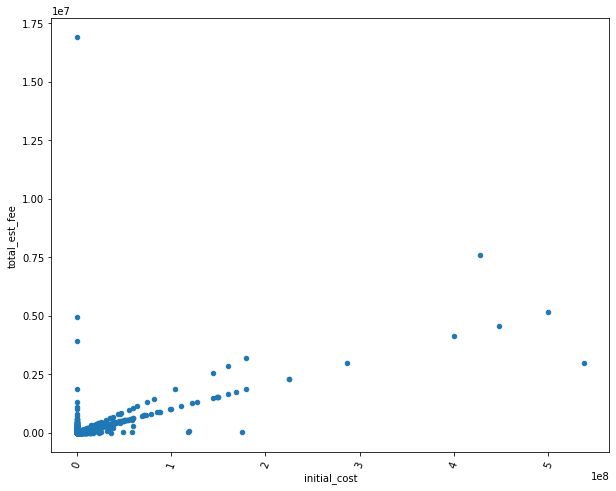

In [35]:
# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70, figsize=(10, 8))
plt.show()

Excellent work! In general, from the second plot it seems like there is a strong correlation between 'initial_cost' and 'total_est_fee'. In addition, take note of the large number of points that have an 'initial_cost' of 0. It is difficult to infer any trends from the first plot because it is dominated by the outliers.

## Tidying Data for Analysis
### Tidy data

* **"Tidy Data"** paper by Hadley Wickham, PhD

#### Principles of tidy data

1. Columns represent separate variables
2. Rows represent individual observations
3. Observational units form tables

#### Converting to tidy data

index | name | treatment a | treatment b
--- | --- | --- | ---
0 | Daniel | - | 42
1 | John | 12 | 31
2 | Jane | 24 | 27


index | name | treatment | value
--- | --- | --- | ---
0 | Daniel | treatment a | -
1 | John | treatment a | 12
2 | Jane | treatment a | 24
3 | Daniel | treatment b | 42
4 | John | treatment b | 31
5 | Jane | treatment b | 27


* Better for reporting vs better for analysis
* Tidy data makes it easier to fix common data problems

### Recognizing tidy data

For data to be tidy, it must have:

Each variable as a separate column.
Each row as a separate observation.
As a data scientist, you'll encounter data that is represented in a variety of different ways, so it is important to be able to recognize tidy (or untidy) data when you see it.

In this exercise, two example datasets have been pre-loaded into the DataFrames df1 and df2. Only one of them is tidy. Your job is to explore these further in the IPython Shell and identify the one that is not tidy, and why it is not tidy.

In the rest of this course, you will frequently be asked to explore the structure of DataFrames in the IPython Shell prior to performing different operations on them. Doing this will not only strengthen your comprehension of the data cleaning concepts covered in this course, but will also help you realize and take advantage of the relationship between working in the Shell and in the script.

In [36]:
df1 = pd.read_csv('data/df1_recognizing_tidy_data.csv')

In [37]:
df1.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [38]:
df2 = pd.read_csv('data/df2_recognizing_tidy_data.csv')

In [39]:
df2['value'] = df2['value'].replace('#NUM!', 'NaN')

In [40]:
df2.head()

,Month,Day,variable,value
0,5,1,Ozone,41
1,5,1,Solar.R,190
2,5,1,Wind,7.4
3,5,1,Temp,67
4,5,2,Ozone,36


Exactly! Notice that the variable column of df2 contains the values Solar.R, Ozone, Temp, and Wind. For it to be tidy, these should all be in separate columns, as in df1.

### Reshaping your data using melt

Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently.

In this exercise, you will practice melting a DataFrame using pd.melt(). There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no value_vars are provided, all columns not set in the id_vars will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R, Wind, and Temp columns into rows. Later in this chapter, you'll learn how to bring this melted DataFrame back into a tidy form.

In [41]:
# Melt airquality (df1): airquality_melt
airquality_melt = pd.melt(df1, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


Well done! This exercise demonstrates that melting a DataFrame is not always appropriate if you want to make it tidy. You may have to perform other transformations depending on how your data is represented.

### Customizing melted data

When melting DataFrames, it would be better to have column names more meaningful than variable and value.

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter. You will now practice doing exactly this. The DataFrame airquality has been pre-loaded for you.

In [42]:
# Melt airquality (df1): airquality_melt
airquality_melt = pd.melt(df1, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


Great work! The DataFrame is more informative now. In the next video, you'll learn about pivoting, which is the opposite of melting. You'll then be able to convert this DataFrame back into its original, tidy, form!

### Pivoting data
#### Pivot: un-melting data

* Opposite of melting
* In melting, we turned columns into rows
* Pivoting: turn unique values into separate columns
* Analysis friendly shape to reporting friendly shape
* Violates tidy data principle: rows contain observations
    * Multiple variables stored in the same column

### Pivot data

Pivoting data is the opposite of melting it. Remember the tidy form that the airquality DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the .pivot_table() method!

While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.

.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). The melted DataFrame airquality_melt has been pre-loaded for you.

In [43]:
# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


Excellent work! Notice that the pivoted DataFrame does not actually look like the original DataFrame. In the next exercise, you'll turn this pivoted DataFrame back into its original form.

### Resetting the index of a DataFrame

After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a [hierarchical index (also known as a MultiIndex)](http://pandas.pydata.org/pandas-docs/stable/advanced.html).

Hierarchical indexes are covered in depth in [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas). In essence, they allow you to group columns or rows by another variable - in this case, by 'Month' as well as 'Day'.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index(). Dan didn't show you how to use this method in the video, but you're now going to practice using it in this exercise to get back the original DataFrame from airquality_pivot, which has been pre-loaded.

In [44]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)


In [45]:
# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

RangeIndex(start=0, stop=153, step=1)


In [46]:
# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3


### Pivoting duplicate values

So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as airquality_dup. In addition, the airquality_melt DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their .shape attributes to confirm the duplicate rows present in airquality_dup.

You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().

NumPy and pandas have been imported as np and pd respectively.

In [48]:
airquality_dup = pd.read_csv('data/airquality_dup.csv')
airquality_dup.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


In [49]:
# Pivot airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)
airquality_pivot = airquality_pivot.reset_index()
print(airquality_pivot.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3


In [50]:
print(df1.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


### Beyond melt and pivot
### Splitting a column with .str

The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.

Begin by printing the columns of tb in the IPython Shell using its .columns attribute, and take note of the problematic column.

In [52]:
tb = pd.read_csv('data/tb.csv')
tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [53]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])
print(tb_melt.head())

  country  year variable  value
0      AD  2000     m014    0.0
1      AE  2000     m014    2.0
2      AF  2000     m014   52.0
3      AG  2000     m014    0.0
4      AL  2000     m014    2.0


In [54]:
# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]
print(tb_melt.head())

  country  year variable  value gender
0      AD  2000     m014    0.0      m
1      AE  2000     m014    2.0      m
2      AF  2000     m014   52.0      m
3      AG  2000     m014    0.0      m
4      AL  2000     m014    2.0      m


In [55]:
# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


Superb! Notice the new 'gender' and 'age_group' columns you created. It is vital to be able to split columns as needed so you can access the data that is relevant to your question.

### Splitting a column with .split() and .get()

Another common way multiple variables are stored in columns is with a delimiter. You'll learn how to deal with such cases in this exercise, using a [dataset consisting of Ebola cases and death counts by state and country](https://data.humdata.org/dataset/ebola-cases-2014). It has been pre-loaded into a DataFrame as ebola.

Print the columns of ebola in the IPython Shell using ebola.columns. Notice that the data has column names such as Cases_Guinea and Deaths_Guinea. Here, the underscore _ serves as a delimiter between the first part (cases or deaths), and the second part (country).

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called .split(). By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on Cases_Guinea, for example, using Cases_Guinea.split('_'), which returns the list ['Cases', 'Guinea'].

The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending on the part you want.

In [56]:
ebola = pd.read_csv('data/ebola.csv')
print(ebola.head())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

In [57]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
print(ebola_melt.head())

         Date  Day  type_country  counts
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0


In [58]:
ebola_melt.type_country.unique()

array(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates',
       'Cases_Spain', 'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia',
       'Deaths_SierraLeone', 'Deaths_Nigeria', 'Deaths_Senegal',
       'Deaths_UnitedStates', 'Deaths_Spain', 'Deaths_Mali'], dtype=object)

In [59]:
# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt['type_country'].str.split('_')
ebola_melt['str_split'].head()

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: str_split, dtype: object

In [60]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt['str_split'].str.get(0)

In [61]:
# Create the 'country' column
ebola_melt['country'] = ebola_melt['str_split'].str.get(1)

In [62]:
# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


## Combining Data for Analysis
### Concatenating Data

### Combining rows of data

The dataset you'll be working with here relates to [NYC Uber data](http://data.beta.nyc/dataset/uber-trip-data-foiled-apr-sep-2014). The original dataset has all the originating Uber pickup locations by time and latitude and longitude. For didactic purposes, you'll be working with a very small portion of the actual data.

Three DataFrames have been pre-loaded: uber1, which contains data for April 2014, uber2, which contains data for May 2014, and uber3, which contains data for June 2014. Your job in this exercise is to concatenate these DataFrames together such that the resulting DataFrame has the data for all three months.

Begin by exploring the structure of these three DataFrames in the IPython Shell using methods such as .head().

In [84]:
uber1 = pd.read_csv('data/uber1.csv')
uber2 = pd.read_csv('data/uber2.csv')
uber3 = pd.read_csv('data/uber3.csv')

In [85]:
print(uber1.head())
print(uber2.head())
print(uber3.head())

       Date     Time      Lat      Lon    Base
0  4/1/2014  0:11:00  40.7690 -73.9549  B02512
1  4/1/2014  0:17:00  40.7267 -74.0345  B02512
2  4/1/2014  0:21:00  40.7316 -73.9873  B02512
3  4/1/2014  0:28:00  40.7588 -73.9776  B02512
4  4/1/2014  0:33:00  40.7594 -73.9722  B02512
       Date     Time      Lat      Lon    Base
0  5/1/2014  0:02:00  40.7521 -73.9914  B02512
1  5/1/2014  0:06:00  40.6965 -73.9715  B02512
2  5/1/2014  0:15:00  40.7464 -73.9838  B02512
3  5/1/2014  0:17:00  40.7463 -74.0011  B02512
4  5/1/2014  0:17:00  40.7594 -73.9734  B02512
       Date     Time      Lat      Lon    Base
0  6/1/2014  0:00:00  40.7293 -73.9920  B02512
1  6/1/2014  0:01:00  40.7131 -74.0097  B02512
2  6/1/2014  0:04:00  40.3461 -74.6610  B02512
3  6/1/2014  0:04:00  40.7555 -73.9833  B02512
4  6/1/2014  0:07:00  40.6880 -74.1831  B02512


In [86]:
row_concat = pd.concat([uber1, uber2, uber3])

In [87]:
print(row_concat.shape)
print(row_concat.head())
print(row_concat.tail())

(297, 5)
       Date     Time      Lat      Lon    Base
0  4/1/2014  0:11:00  40.7690 -73.9549  B02512
1  4/1/2014  0:17:00  40.7267 -74.0345  B02512
2  4/1/2014  0:21:00  40.7316 -73.9873  B02512
3  4/1/2014  0:28:00  40.7588 -73.9776  B02512
4  4/1/2014  0:33:00  40.7594 -73.9722  B02512
        Date     Time      Lat      Lon    Base
94  6/1/2014  6:27:00  40.7554 -73.9738  B02512
95  6/1/2014  6:35:00  40.7543 -73.9817  B02512
96  6/1/2014  6:37:00  40.7751 -73.9633  B02512
97  6/1/2014  6:46:00  40.6952 -74.1784  B02512
98  6/1/2014  6:51:00  40.7621 -73.9817  B02512


### Combining columns of data

Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. To perform this action, you use the same pd.concat() function, but this time with the keyword argument axis=1. The default, axis=0, is for a row-wise concatenation.

You'll return to the Ebola dataset you worked with briefly in the last chapter. It has been pre-loaded into a DataFrame called ebola_melt. In this DataFrame, the status and country of a patient is contained in a single column. This column has been parsed into a new DataFrame, status_country, where there are separate columns for status and country.

Explore the ebola_melt and status_country DataFrames in the IPython Shell. Your job is to concatenate them column-wise in order to obtain a final, clean DataFrame.

In [88]:
status_country = ebola_melt[['type', 'country']].copy()

In [89]:
ebola_melt_2 = ebola_melt[['Date', 'Day', 'type_country', 'counts']].copy()

In [90]:
print(status_country.head())
print(ebola_melt_2.head())

    type country
0  Cases  Guinea
1  Cases  Guinea
2  Cases  Guinea
3  Cases  Guinea
4  Cases  Guinea
         Date  Day  type_country  counts
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0


In [91]:
ebola_tidy = pd.concat([ebola_melt_2, status_country], axis=1)

In [92]:
print(ebola_tidy.head())

         Date  Day  type_country  counts   type country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


### Finding and Concatenating Data

### Finding files that match a pattern

You're now going to practice using the glob module to find all csv files in the workspace. In the next exercise, you'll programmatically load them into DataFrames.

As Dan showed you in the video, the glob module has a function called glob that takes a pattern and returns a list of the files in the working directory that match that pattern.

For example, if you know the pattern is part_ single digit number .csv, you can write the pattern as 'part_?.csv' (which would match part_1.csv, part_2.csv, part_3.csv, etc.)

Similarly, you can find all .csv files with '*.csv', or all parts with 'part_*'. The ? wildcard represents any 1 character, and the * wildcard represents any number of characters.

In [93]:
csv_files = glob('data/uber?.csv')

In [94]:
print(csv_files)

['data/uber3.csv', 'data/uber2.csv', 'data/uber1.csv']


### Iterating and concatenating all matches

Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.

You'll start with an empty list called frames. Your job is to use a for loop to iterate through each of the filenames, read each filename into a DataFrame, and then append it to the frames list.

You can then concatenate this list of DataFrames using pd.concat(). Go for it!

In [95]:
list_data = []
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)

In [96]:
uber_new = pd.concat(list_data)

In [97]:
print(uber_new.head())

       Date     Time      Lat      Lon    Base
0  6/1/2014  0:00:00  40.7293 -73.9920  B02512
1  6/1/2014  0:01:00  40.7131 -74.0097  B02512
2  6/1/2014  0:04:00  40.3461 -74.6610  B02512
3  6/1/2014  0:04:00  40.7555 -73.9833  B02512
4  6/1/2014  0:07:00  40.6880 -74.1831  B02512


### Merge Data

```python
pd.merge(left=state_populations, right=state_codes, on=None, left_on='state', right_on='name')
```

use the 'on' parameter if the columns from the DataFrames are spelled the same

**Types of Merges**
* One-to-one
* Many-to-one / One-to-many
* Many-to-many

### 1-to-1 data merge

Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.

Here, you'll be using survey data that contains readings that William Dyer, Frank Pabodie, and Valentina Roerich took in the late 1920 and 1930 while they were on an expedition towards Antarctica. The dataset was taken from a sqlite database from the [Software Carpentry SQL lesson](http://swcarpentry.github.io/sql-novice-survey/).

Two DataFrames have been pre-loaded: site and visited. Explore them in the IPython Shell and take note of their structure and column names. Your task is to perform a 1-to-1 merge of these two DataFrames using the 'name' column of site and the 'site' column of visited.

In [98]:
site = pd.DataFrame(data=[['DR-1', -49.85, -128.57],
                          ['DR-3', -47.15, -126.72],
                          ['MSK-4', -48.87, -123.40]],
                    index=range(0,3), columns=['name', 'lat', 'long'])

In [99]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [100]:
visited = pd.DataFrame(data=[[619, 'DR-1', '1927-02-08'],
                             [734, 'DR-3', '1939-01-07'],
                             [837, 'MSK-4', '1932-01-14']],
                       index=range(0,3), columns=['ident', 'site', 'dated'])

In [101]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,734,DR-3,1939-01-07
2,837,MSK-4,1932-01-14


In [102]:
o2o = pd.merge(left=site, right=visited, on=None, left_on='name', right_on='site')

In [103]:
o2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


Superb! Notice the 1-to-1 correspondence between the name column of the site DataFrame and the site column of the visited DataFrame. This is what made the 1-to-1 merge possible.

### Many-to-1 data merge

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

Here, the two DataFrames site and visited have been pre-loaded once again. Note that this time, visited has multiple entries for the site column. Confirm this by exploring it in the IPython Shell.

The .merge() method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.

In [104]:
visited_new = pd.DataFrame(data=[[622, 'DR-1', '1927-02-10'],
                                 [735, 'DR-3', '1930-01-12'],
                                 [751, 'DR-3', '1930-02-26'],
                                 [752, 'DR-3', 'NaN'],
                                 [844, 'DR-1', '1932-03-22']],
                           index=range(0,5), columns=['ident', 'site', 'dated'])

In [105]:
visited_new

,ident,site,dated
0,622,DR-1,1927-02-10
1,735,DR-3,1930-01-12
2,751,DR-3,1930-02-26
3,752,DR-3,NaN
4,844,DR-1,1932-03-22


In [106]:
visited = pd.concat([visited, visited_new]).reset_index(drop=True)

In [107]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,734,DR-3,1939-01-07
2,837,MSK-4,1932-01-14
3,622,DR-1,1927-02-10
4,735,DR-3,1930-01-12
5,751,DR-3,1930-02-26
6,752,DR-3,NaN
7,844,DR-1,1932-03-22


In [108]:
m2o = pd.merge(left=site, right=visited, on=None, left_on='name', right_on='site')

In [109]:
m2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


### Many-to-many data merge

The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Two example DataFrames that share common key values have been pre-loaded: df1 and df2. Another DataFrame df3, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

Here, you'll work with the site and visited DataFrames from before, and a new survey DataFrame. Your task is to merge site and visited as you did in the earlier exercises. You will then merge this merged DataFrame with survey.

Begin by exploring the site, visited, and survey DataFrames in the IPython Shell.

In [110]:
df1 = pd.DataFrame(data=[['a', 1], ['a', 2], ['b', 3], ['b', 4]], index=range(0,4), columns=['c1', 'c2'])

In [111]:
df2 = pd.DataFrame(data=[['a', 10], ['a', 20], ['b', 30], ['b', 40]], index=range(0,4), columns=['c1', 'c2'])

In [112]:
df3 = pd.DataFrame(data=[['a', 1, 10], ['a', 1, 20], ['a', 2, 10], ['a', 2, 20], ['b', 3, 30], ['b', 3, 40], ['b', 4, 30], ['b', 4, 40]], index=range(0,8), columns=['c1', 'c2_x', 'c2_y'])

In [113]:
survey = pd.read_csv('data/survey.csv')
survey.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [114]:
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')
m2m

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [115]:
# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')
m2m.head()

,name,lat,long,ident,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,DR-1,-49.85,-128.57,844,DR-1,1932-03-22,844,roe,rad,11.25


## Cleaning Data for Analysis
### Data Types

#### Converting data types

In this exercise, you'll see how ensuring all categorical variables in a DataFrame are of type category reduces memory usage.

The [tips dataset](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) has been loaded into a DataFrame called tips. This data contains information about how much a customer tipped, whether the customer was male or female, a smoker or not, etc.

Look at the output of tips.info() in the IPython Shell. You'll note that two columns that should be categorical - sex and smoker - are instead of type object, which is pandas' way of storing arbitrary strings. Your job is to convert these two columns to type category and note the reduced memory usage.

In [4]:
path_to_data = r'data/tips.csv'

In [5]:
tips = pd.read_csv(path_to_data)

In [6]:
tips.sex = tips.sex.astype('category')

In [7]:
tips.smoker = tips.smoker.astype('category')

In [8]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.4+ KB
None


In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Excellent! By converting sex and smoker to categorical variables, the memory usage of the DataFrame went down from 13.4 KB to 10.1KB. This may seem like a small difference here, but when you're dealing with large datasets, the reduction in memory usage can be very significant!

#### Working with numeric data

If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.

You can use the pd.to_numeric() function to convert a column into a numeric data type. If the function raises an error, you can be sure that there is a bad value within the column. You can either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.

A modified version of the tips dataset has been pre-loaded into a DataFrame called tips. For instructional purposes, it has been pre-processed to introduce some 'bad' data for you to clean. Use the .info() method to explore this. You'll note that the total_bill and tip columns, which should be numeric, are instead of type object. Your job is to fix this.

In [10]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

In [11]:
# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

In [12]:
# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.4+ KB
None


Great work! The 'total_bill' and 'tip' columns in this DataFrame are stored as object types because the string 'missing' is used in these columns to encode missing values. By coercing the values into a numeric type, they become proper NaN values.

### Using Regular Expressions to Clean Strings

![alt text](images/regex_example.JPG "Regex Example")

```python
inport re
pattern = re.compile('\$\d*\.\d{2}')
result = pattern.match('$17.89')
bool(result)
```

#### String parsing with regular expressions

In the video, Dan introduced you to the basics of regular expressions, which are powerful ways of defining patterns to match strings. This exercise will get you started with writing them.

When working with data, it is sometimes necessary to write a regular expression to look for properly entered values. Phone numbers in a dataset is a common field that needs to be checked for validity. Your job in this exercise is to define a regular expression to match US phone numbers that fit the pattern of xxx-xxx-xxxx.

The [regular expression module](https://docs.python.org/3/library/re.html) in python is re. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using re.compile(), and then use the compiled pattern to match values.

* Import re.
* Compile a pattern that matches a phone number of the format xxx-xxx-xxxx.
    * Use \d{x} to match x digits. Here you'll need to use it three times: twice to match 3 digits, and once to match 4 digits.
    * Place the regular expression inside re.compile().
* Using the .match() method on prog, check whether the pattern matches the string '123-456-7890'.
* Using the same approach, now check whether the pattern matches the string '1123-456-7890'.

In [13]:
# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

In [14]:
# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

True


In [15]:
# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

False


#### Extracting numerical values from strings

Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas'.

It would be useful to extract the 6 and the 2 from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to re.findall(), and it will return a list of the matches.

* Write a pattern that will find all the numbers in the following string: 'the recipe calls for 10 strawberries and 1 banana'. To do this:
    * Use the re.findall() function and pass it two arguments: the pattern, followed by the string.
    * \d is the pattern required to find digits. This should be followed with a + so that the previous element is matched one or more times. This ensures that 10 is viewed as one number and not as 1 and 0.
* Print the matches to confirm that your regular expression found the values 10 and 1.

In [16]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

In [17]:
# Print the matches
print(matches)

['10', '1']


#### Pattern matching

In this exercise, you'll continue practicing your regular expression skills. For each provided string, your job is to write the appropriate pattern to match it.

* Write patterns to match:
    * A telephone number of the format xxx-xxx-xxxx. You already did this in a previous exercise.
    * A string of the format: A dollar sign, an arbitrary number of digits, a decimal point, 2 digits.
        * Use \$ to match the dollar sign, \d* to match an arbitrary number of digits, \\. to match the decimal point, and \d{x} to match x number of digits.
    * A capital letter, followed by an arbitrary number of alphanumeric characters.
        * Use [A-Z] to match any capital letter followed by \w* to match an arbitrary number of alphanumeric characters.

In [132]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

True


In [133]:
# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

True


In [134]:
# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True


### Using Functions to Clean Data
#### Custom Functions to Clean Data

Here, you'll dive into some of the grittier aspects of data cleaning. You'll learn about string manipulation and pattern matching to deal with unstructured data, and then explore techniques to deal with missing or duplicate data. You'll also learn the valuable skill of programmatically checking your data for consistency, which will give you confidence that your code is running correctly and that the results of your analysis are reliable!

#### Complex Cleaning

* Cleaning step requires multiple steps
    * Extract number from string
    * Perform transformation on extracted number
* Python function

#### Using Apply

In [135]:
ex1_df = pd.DataFrame(data=[['Daniel', 18, 42],
                               ['John', 12, 31],
                               ['Jane', 24, 27]],
                         index=range(0,3),
                         columns=['name', 'treatment a', 'treatment b'])

In [136]:
ex1_df

,name,treatment a,treatment b
0,Daniel,18,42
1,John,12,31
2,Jane,24,27


In [137]:
ex1_df = ex1_df.set_index('name')

In [138]:
ex1_df

,treatment a,treatment b
name,,
Daniel,18,42
John,12,31
Jane,24,27


In [139]:
ex1_df.apply(np.mean, axis=0)

treatment a    18.000000
treatment b    33.333333
dtype: float64

In [140]:
ex1_df.apply(np.mean, axis=1)

name
Daniel    30.0
John      21.5
Jane      25.5
dtype: float64

In [141]:
ex2_df = pd.DataFrame(data=[[121577873, 2, 'MANHATTAN', '$75000.00', '$986.00'],
                            [520129502, 1, 'STATEN ISLAND', '$0.00', '$1144.00'],
                            [121601560, 1, 'MANHATTAN', '$30000.00', '$522.50'],
                            [121601203, 1, 'MANHATTAN', '$1500.00', '$225.00'],
                            [121601338, 1, 'MANHATTAN', '$19500.00', '$389.50']],
                      index=range(0,5),
                      columns=['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee'])

In [142]:
ex2_df

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee
0,121577873,2,MANHATTAN,$75000.00,$986.00
1,520129502,1,STATEN ISLAND,$0.00,$1144.00
2,121601560,1,MANHATTAN,$30000.00,$522.50
3,121601203,1,MANHATTAN,$1500.00,$225.00
4,121601338,1,MANHATTAN,$19500.00,$389.50


In [143]:
# Regular expression pattern for monetary values
pattern = re.compile('^\$\d*\.\d{2}$')

In [144]:
def diff_money(row, pattern):
    icost = row['Initial Cost']
    tef = row['Total Est. Fee']
    
    if bool(pattern.match(icost)) and bool(pattern.match(tef)):
        icost = icost.replace('$', '')
        tef = tef.replace('$', '')
        
        icost = float(icost)
        tef = float(tef)
        
        return icost - tef
    else:
        return(NaN)

In [145]:
ex2_df['diff'] = ex2_df.apply(diff_money,
                              axis=1,
                              pattern=pattern)

In [146]:
ex2_df

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,diff
0,121577873,2,MANHATTAN,$75000.00,$986.00,74014.0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,-1144.0
2,121601560,1,MANHATTAN,$30000.00,$522.50,29477.5
3,121601203,1,MANHATTAN,$1500.00,$225.00,1275.0
4,121601338,1,MANHATTAN,$19500.00,$389.50,19110.5


### Custom functions to clean data

You'll now practice writing functions to clean data.

The tips dataset has been pre-loaded into a DataFrame called ```tips```. It has a ```'sex'``` column that contains the values ```'Male'``` or ```'Female'```. Your job is to write a function that will recode ```'Female'``` to ```0```, ```'Male'``` to ```1```, and return ```np.nan``` for all entries of ```'sex'``` that are neither ```'Female'``` nor ```'Male'```.

Recoding variables like this is a common data cleaning task. Functions provide a mechanism for you to abstract away complex bits of code as well as reuse code. This makes your code more readable and less error prone.

As Dan showed you in the videos, you can use the ```.apply()``` method to apply a function across entire rows or columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be applied across Series. Here, you will apply your function over the ```'sex'``` column.

#### Instructions

* Define a function named ```recode_gender()``` that has one parameter: ```gender```.
    * If ```gender``` equals ```'Male'```, return ```1```.
    * Else, if ```gender``` equals ```'Female'```, return ```0```.
    * If ```gender``` does not equal ```'Male'``` or ```'Female'```, return ```np.nan``. NumPy has been pre-imported for you.
* Apply your ```recode_gender()``` function over ```tips.sex``` using the ```.apply()``` method to create a new column: ```'recode'```. Note that when passing in a function inside the ```.apply()``` method, you don't need to specify the parentheses after the function name.
* Hit 'Submit Answer' and take note of the new ```'gender_recode'``` column in the ```tips``` DataFrame!

In [18]:
tips = pd.read_csv('data/tips_data_cleaning.csv')

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [157]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Male':
        return 1
    
    # Return np.nan    
    else:
        return NaN

In [158]:
# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

In [159]:
# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  recode
0       16.99  1.01  Female     No  Sun  Dinner     2       0
1       10.34  1.66    Male     No  Sun  Dinner     3       1
2       21.01  3.50    Male     No  Sun  Dinner     3       1
3       23.68  3.31    Male     No  Sun  Dinner     2       1
4       24.59  3.61  Female     No  Sun  Dinner     4       0


Well done! For simple recodes, you can also use the ```replace``` method. You can also convert the column into a categorical type.

### Lambda Functions

You'll now be introduced to a powerful Python feature that will help you clean your data more effectively: lambda functions. Instead of using the ```def``` syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.

For example, here's a function that squares a variable used in an ```.apply()``` method:

```python
def my_square(x):
    return x ** 2
```

```python
df.apply(my_square)
```

The equivalent code using a lambda function is:

```python
df.apply(lambda x: x ** 2)
```

The lambda function takes one parameter - the variable ```x```. The function itself just squares ```x``` and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

The tips dataset has been pre-loaded into a DataFrame called ```tips```. Your job is to clean its ```'total_dollar'``` column by removing the dollar sign. You'll do this using two different methods: With the ```.replace()``` method, and with regular expressions. The regular expression module ```re``` has been pre-imported.

#### Instructions

* Use the .replace() method inside a lambda function to remove the dollar sign from the 'total_dollar' column of tips.
    * You need to specify two arguments to the .replace() method: The string to be replaced ("$"), and the string to replace it by ('').
    * Apply the lambda function over the 'total_dollar' column of tips.
* Use a regular expression to remove the dollar sign from the 'total_dollar' column of tips.
    * The pattern has been provided for you: It is the first argument of the re.findall() function.
    * Complete the rest of the lambda function and apply it over the 'total_dollar' column of tips. Notice that because re.findall() returns a list, you have to slice it in order to access the actual value.
* Hit 'Submit Answer' to verify that you have removed the dollar sign from the column.

In [160]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_bill.apply(lambda x: str(x).replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_bill.apply(lambda x: re.findall('\d+\.\d+', str(x))[0])

# Print the head of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  recode  \
0       16.99  1.01  Female     No  Sun  Dinner     2       0   
1       10.34  1.66    Male     No  Sun  Dinner     3       1   
2       21.01  3.50    Male     No  Sun  Dinner     3       1   
3       23.68  3.31    Male     No  Sun  Dinner     2       1   
4       24.59  3.61  Female     No  Sun  Dinner     4       0   

  total_dollar_replace total_dollar_re  
0                16.99           16.99  
1                10.34           10.34  
2                21.01           21.01  
3                23.68           23.68  
4                24.59           24.59  


### Duplicate and Missing Data

#### Duplicate Data
* Can skew results
* ```.drop_duplicates()``` method

In [161]:
ex3_df = pd.DataFrame(data=[['Daniel', 'male', '', 42],
                            ['John', 'male', 12, 31],
                            ['Jane', 'female', 24, 27],
                            ['Daniel', 'male', '', 42]],
                      index=range(0,4),
                      columns=['name', 'gender', 'treatment a', 'treatment b'])

In [162]:
ex3_df

,name,gender,treatment a,treatment b
0,Daniel,male,,42
1,John,male,12,31
2,Jane,female,24,27
3,Daniel,male,,42


In [163]:
ex3_df.drop_duplicates()

,name,gender,treatment a,treatment b
0,Daniel,male,,42
1,John,male,12,31
2,Jane,female,24,27


#### Missing Data

* Leave as-is
* Drop them
* Fill missing value using various Pandas methods

In [164]:
ex4_df = pd.DataFrame(columns=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'total_dollar', 'recode', 'total_dollar_replace', 'total_dollar_re'],
                      data=[[16.99,1.01,'Female','No','Sun','Dinner',2,'$16.99' ,0,16.99 ,16.99],
                            [NaN,1.66,'Male','No','Sun','Dinner',3,'$10.34' ,1,10.34 ,10.34],
                            [21.01,3.5,'Male','No','Sun','Dinner',3,'$21.01' ,1,21.01 ,21.01],
                            [23.68,NaN,'Male','No','Sun','Dinner',2,'$23.68' ,1,23.68 ,23.68],
                            [24.59,3.61,NaN,NaN,'Sun',NaN,4,'$24.59' ,0,24.59 ,24.59]])

ex4_df

,total_bill,tip,sex,smoker,day,time,size,total_dollar,recode,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,0,16.99,16.99
1,NaN,1.66,Male,No,Sun,Dinner,3,$10.34,1,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,1,21.01,21.01
3,23.68,NaN,Male,No,Sun,Dinner,2,$23.68,1,23.68,23.68
4,24.59,3.61,NaN,NaN,Sun,NaN,4,$24.59,0,24.59,24.59


In [165]:
ex4_df_nan = ex4_df
ex4_df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_bill            4 non-null      float64
 1   tip                   4 non-null      float64
 2   sex                   4 non-null      object 
 3   smoker                4 non-null      object 
 4   day                   5 non-null      object 
 5   time                  4 non-null      object 
 6   size                  5 non-null      int64  
 7   total_dollar          5 non-null      object 
 8   recode                5 non-null      int64  
 9   total_dollar_replace  5 non-null      float64
 10  total_dollar_re       5 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 568.0+ bytes


#### .dropna()

In [166]:
tips_dropped = ex4_df_nan.dropna()
tips_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_bill            2 non-null      float64
 1   tip                   2 non-null      float64
 2   sex                   2 non-null      object 
 3   smoker                2 non-null      object 
 4   day                   2 non-null      object 
 5   time                  2 non-null      object 
 6   size                  2 non-null      int64  
 7   total_dollar          2 non-null      object 
 8   recode                2 non-null      int64  
 9   total_dollar_replace  2 non-null      float64
 10  total_dollar_re       2 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 192.0+ bytes


#### .fillna()

* Fill with a user provided value
* Usa a summary statistic
    * mean
    * median
    * Use caution when filling with a test statistic
        * The value used, must make sense
        * Median is a better statistics if there are outliers

In [167]:
tips_fill = ex4_df.copy()
tips_fill['sex'] = tips_fill['sex'].fillna('missing')
tips_fill[['total_bill', 'size']] = tips_fill[['total_bill', 'size']].fillna(0)

In [168]:
tips_fill

,total_bill,tip,sex,smoker,day,time,size,total_dollar,recode,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,0,16.99,16.99
1,0.00,1.66,Male,No,Sun,Dinner,3,$10.34,1,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,1,21.01,21.01
3,23.68,NaN,Male,No,Sun,Dinner,2,$23.68,1,23.68,23.68
4,24.59,3.61,missing,NaN,Sun,NaN,4,$24.59,0,24.59,24.59


In [169]:
mean_tip = ex4_df['tip'].mean()
mean_tip

2.445

In [170]:
tips_fill['tip'] = tips_fill['tip'].fillna(mean_tip)
tips_fill

,total_bill,tip,sex,smoker,day,time,size,total_dollar,recode,total_dollar_replace,total_dollar_re
0,16.99,1.010,Female,No,Sun,Dinner,2,$16.99,0,16.99,16.99
1,0.00,1.660,Male,No,Sun,Dinner,3,$10.34,1,10.34,10.34
2,21.01,3.500,Male,No,Sun,Dinner,3,$21.01,1,21.01,21.01
3,23.68,2.445,Male,No,Sun,Dinner,2,$23.68,1,23.68,23.68
4,24.59,3.610,missing,NaN,Sun,NaN,4,$24.59,0,24.59,24.59


##### Dropping duplicate data

Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.

A dataset consisting of the performance of songs on the Billboard charts has been pre-loaded into a DataFrame called billboard. Check out its columns in the IPython Shell. Your job in this exercise is to subset this DataFrame and then drop all duplicate rows.

* Create a new DataFrame called tracks that contains the following columns from billboard: 'year', 'artist', 'track', and 'time'.
* Print the info of tracks. This has been done for you.
* Drop duplicate rows from tracks using the .drop_duplicates() method. Save the result to tracks_no_duplicates.
* Print the info of tracks_no_duplicates. This has been done for you, so hit 'Submit Answer' to see the results!

In [179]:
billboard = pd.read_csv(r'data/billboard.csv', dtype={'year': 'int64'})

In [180]:
billboard.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2Ge+her,The Hardest Part Of ...,3:15,9/2/2000,wk1,91.0
1,2000,2 Pac,Baby Don't Cry,4:22,2/26/2000,wk1,87.0
2,2000,3 Doors Down,Kryptonite,3:53,4/8/2000,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,10/21/2000,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,4/15/2000,wk1,57.0


In [181]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24071 entries, 0 to 24070
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          24071 non-null  int64  
 1   artist        24071 non-null  object 
 2   track         24071 non-null  object 
 3   time          24071 non-null  object 
 4   date.entered  24071 non-null  object 
 5   week          24071 non-null  object 
 6   rank          5307 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


In [182]:
# Create the new DataFrame: tracks
tracks = billboard[['year', 'artist', 'track', 'time']]

In [183]:
tracks.head()

,year,artist,track,time
0,2000,2Ge+her,The Hardest Part Of ...,3:15
1,2000,2 Pac,Baby Don't Cry,4:22
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35


In [184]:
# Print info of tracks
print(tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24071 entries, 0 to 24070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    24071 non-null  int64 
 1   artist  24071 non-null  object
 2   track   24071 non-null  object
 3   time    24071 non-null  object
dtypes: int64(1), object(3)
memory usage: 752.3+ KB
None


In [185]:
# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

In [186]:
# Print info of tracks
print(tracks_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    317 non-null    int64 
 1   artist  317 non-null    object
 2   track   317 non-null    object
 3   time    317 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.4+ KB
None


#### Filling missing data

Here, you'll return to the airquality dataset from Chapter 2. It has been pre-loaded into the DataFrame airquality, and it has missing values for you to practice filling in. Explore airquality in the IPython Shell to checkout which columns have missing values.

It's rare to have a (real-world) dataset without any missing values, and it's important to deal with them because certain calculations cannot handle missing values while some calculations will, by default, skip over any missing values.

Also, understanding how much missing data you have, and thinking about where it comes from is crucial to making unbiased interpretations of data.

* Calculate the mean of the Ozone column of airquality using the .mean() method on airquality.Ozone.
* Use the .fillna() method to replace all the missing values in the Ozone column of airquality with the mean, oz_mean.
* Hit 'Submit Answer' to see the result of filling in the missing values!

In [187]:
airquality = pd.read_csv(r'data/airquality.csv')

In [188]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [189]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
None


### Testing with Asserts

#### Assert Statements

* Programmatically vs visually checking
* If we drop of fill NaNs, we expect 0 missing values
* We can write an assert statement to verify this
* We can detect early warnings and errors
* This gives us confidence that our code is running correctly

In [190]:
assert 1 == 1

In [191]:
assert 1 == 2

AssertionError: 

In [192]:
#### Google stock data
gsd_df = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'],
                      data=[['2017-02-09', 831.729980 , NaN, 826.500000, 830.059998, 1192000.0, NaN],
                            ['2017-02-08', 830.530029, 834.250000, 825.109985, 829.880005, 1300600.0, 829.880005],
                            ['2017-02-07', NaN, NaN, 823.289978, NaN, 1664800.0, NaN],
                            ['2017-02-06', 820.919983, 822.390015, NaN, 821.619995, NaN, 821.619995],
                            ['2017-02-03', NaN, 826.130005, 819.349976, 820.130005, 1524400.0, 820.130005]])

In [193]:
gsd_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-02-09,831.729980,NaN,826.500000,830.059998,1192000.0,NaN
1,2017-02-08,830.530029,834.250000,825.109985,829.880005,1300600.0,829.880005
2,2017-02-07,NaN,NaN,823.289978,NaN,1664800.0,NaN
3,2017-02-06,820.919983,822.390015,NaN,821.619995,NaN,821.619995
4,2017-02-03,NaN,826.130005,819.349976,820.130005,1524400.0,820.130005


In [194]:
assert gsd_df.Close.notnull().all()

AssertionError: 

In [195]:
gsd_df_0 = gsd_df.fillna(value=0)

assert gsd_df_0.Close.notnull().all()

#### Testing your data with asserts

Here, you'll practice writing assert statements using the Ebola dataset from previous chapters to programmatically check for missing values and to confirm that all values are positive. The dataset has been pre-loaded into a DataFrame called ebola.

In the video, you saw Dan use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. The .all() method returns True if all values are True. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another .all() method so that you return only one True or False value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use pd.notnull(df) as an alternative to df.notnull().

* Write an assert statement to confirm that there are no missing values in ebola.
    * Use the pd.notnull() function on ebola (or the .notnull() method of ebola) and chain two .all() methods (that is, .all().all()). The first .all() method will return a True or False for each column, while the second .all() method will return a single True or False.
* Write an assert statement to confirm that all values in ebola are greater than or equal to 0.
    * Chain two all() methods to the Boolean condition (ebola >= 0).

In [196]:
ebola = pd.read_csv(r'data/ebola.csv')

In [197]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [198]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [16]:
# Assert that there are no missing values
assert ebola.notnull().all().all()

NameError: name 'ebola' is not defined

In [17]:
# Assert that all values are >= 0
assert (ebola >= 0).all().all()

NameError: name 'ebola' is not defined

In [201]:
ebola_0 = ebola.fillna(0)

In [202]:
ebola_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         122 non-null    float64
 3   Cases_Liberia        122 non-null    float64
 4   Cases_SierraLeone    122 non-null    float64
 5   Cases_Nigeria        122 non-null    float64
 6   Cases_Senegal        122 non-null    float64
 7   Cases_UnitedStates   122 non-null    float64
 8   Cases_Spain          122 non-null    float64
 9   Cases_Mali           122 non-null    float64
 10  Deaths_Guinea        122 non-null    float64
 11  Deaths_Liberia       122 non-null    float64
 12  Deaths_SierraLeone   122 non-null    float64
 13  Deaths_Nigeria       122 non-null    float64
 14  Deaths_Senegal       122 non-null    float64
 15  Deaths_UnitedStates  122 non-null    flo

In [182]:
# Assert that there are no missing values
assert ebola_0.notnull().all().all()

In [183]:
# Assert that all values are >= 0
assert (ebola_0 >= 0).all().all()

TypeError: '>=' not supported between instances of 'str' and 'int'

## Putting It All Together

* Use the techniques you've learned on the Gapminder data
* Clean and tidy data saved to a file
    * Ready to be loaded for analysis!
* Dataset consists of life expectancy by country and year
* Data will come in multiple pars
    * Load
    * Preliminary quality diagnosis
    * Combine into single dataset
    
```python
import pandas as pd
df = pd.read_csv('my_data.csv')
df.head()
df.info()
df.columns
df.describe()
df.column.value_counts()
df.column.plot('hist')
```

#### Data quality

```python
def cleaning_function(row_data):
    # data cleaning steps
    return ...

# axis=1 -> row
# axis=0 -> column, default
df.apply(cleaning_function, axis=1)

# use asset to check that expected values are what's in the data
# no error -> value passed into the assert statement is True
assert (df.column_data > 0).all()
```

#### Combining Data

```python
pd.merge(df1, df2, ...)
pd.concat([df1, df2, df3, ...])
```

#### Exploratory analysis
Whenever you obtain a new dataset, your first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

The Gapminder data for the 19th century has been loaded into a DataFrame called ```g1800s```. In the IPython Shell, use pandas methods such as ```.head()```, ```.info()```, and ```.describe()```, and DataFrame attributes like ```.columns``` and ```.shape``` to explore it.

Use the information that you acquire from your exploratory analysis to choose the true statement from the options provided below.

#### Possible Answers
* The DataFrame has 259 rows and 100 columns.
* The DataFrame has no missing values encoded as NaN.
* #### 100 of the columns are of type float64 and 1 column is of type object.
* The DataFrame takes up 203.2+ KB of memory.

In [203]:
g1800s = pd.read_csv(r'data/g1800s.csv')

In [204]:
g1800s.head()

,Life_Expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,27.81,27.80,27.79,27.78,27.77,27.76,27.75,27.74,27.73,27.72,27.71,27.7,27.69,27.68,27.67,27.66,27.65,27.64,27.63,27.62,27.61,27.60,27.59,27.58,27.57,27.56,27.54,27.53,27.52,27.51,27.5,27.49,27.48,27.47,27.46,27.45,27.44,27.43,27.42,27.41,27.40,27.39,27.38,27.37,27.36,27.35,27.34,27.33,27.32,27.31,27.30,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.4,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.4,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,20.00,15.0,22.00,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,21.00,11.00,15.0,22.00,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


In [205]:
g1800s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 101 entries, Life_Expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 205.3+ KB


In [206]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,31.521741,31.481891,31.472736,31.467214,31.516318,31.647413,31.627512,31.721542,31.574726,31.488607,31.560796,31.620597,31.722090,31.770647,31.709005,31.666816,31.597313,31.633582,31.577861,31.559950,31.640100,31.604776,31.569204,31.564328,31.551990,31.674428,31.640697,31.580647,31.641294,31.631741,31.714229,31.729602,31.734179,31.719104,31.778109,31.825473,31.547164,31.619005,31.616716,31.466070,31.635721,31.772985,31.785821,31.784627,31.573085,31.704726,31.716269,31.718259,31.723532,31.693134,31.765721,31.734279,31.670597,31.721542,31.654776,31.615373,31.501144,31.509502,31.252786,31.551791,31.773980,31.710697,31.781841,31.850796,31.895124,31.775622,31.954577,32.020597,31.967065,32.125423,32.116020,32.162985,32.103035,32.237960,32.367114,32.417612,32.463284,32.504577,32.530050,32.511144,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,3.821229,3.745395,3.842306,3.758389,3.810340,4.063246,4.046057,4.245205,4.542525,4.545624,4.453902,3.983287,4.205397,4.303869,4.144827,4.102705,4.020460,4.114650,3.936358,3.886279,3.996987,3.943266,3.952972,4.048878,3.874715,4.104158,4.075289,3.975973,4.001474,4.053380,4.070845,4.350933,4.229420,4.223789,4.518248,4.403740,4.236595,3.988986,4.388791,4.430549,4.591803,4.335759,4.204967,4.249807,4.971017,4.222612,4.474738,4.165805,4.158788,4.183290,4.544357,4.309706,4.253885,4.216144,4.194637,4.234977,4.316673,4.920283,5.281793,4.669639,4.665733,4.589141,4.763604,4.717310,4.648558,5.044454,4.732505,4.914606,5.022266,4.961816,4.837682,4.928143,5.050674,5.057394,5.115991,5.244099,5.242046,5.382268,5.564727,5.922702,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,23.390000,23.390000,23.000000,23.390000,23.390000,23.390000,23.390000,23.390000,5.500000,1.500000,6.500000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.000000,20.380000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,20.000000,22.410000,23.390000,15.000000,23.390000,18.310000,23.390000,14.

In [207]:
g1800s.columns

Index(['Life_Expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899'],
      dtype='object', length=101)

In [208]:
g1800s.shape

(260, 101)

#### Exactly! This information is provided by the g1800s.info(). 'Life expectancy' is the only column in the DataFrame that is not of type float64.

#### Visualizing your data

Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame ```g1800s``` has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in ```'1800'``` on the x-axis and life expectancy in ```'1899'``` on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

* Import matplotlib.pyplot as plt.
* Use the .plot() method on g1800s with kind='scatter' to create a scatter plot with '1800' on the x-axis and '1899' on the y-axis.
* Display the plot.

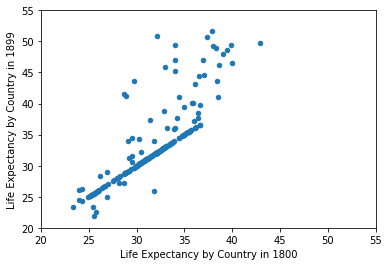

In [209]:
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

plt.show()

#### Excellent work! As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

#### Thinking about the question at hand

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

* 'Life expectancy' is the first column (index 0) of the DataFrame.
* The other columns contain either null or numeric values.
* The numeric values are all greater than or equal to 0.
* There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

#### Instructions

* Define a function called check_null_or_valid() that takes in one argument: row_data.
* Inside the function, convert no_na to a numeric data type using pd.to_numeric().
* Write an assert statement to make sure the first column (index 0) of the g1800s DataFrame is 'Life expectancy'.
* Write an assert statement to test that all the values are valid for the g1800s DataFrame. Use the check_null_or_valid() function placed inside the .apply() method for this. Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the .all() method twice, and remember that you don't have to use () for functions placed inside .apply().
* Write an assert statement to make sure that each country occurs only once in the data. Use the .value_counts() method on the 'Life expectancy' column for this. Specifically, index 0 of .value_counts() will contain the most frequently occuring value. If this is equal to 1 for the 'Life expectancy' column, then you can be certain that no country appears more than once in the data.

In [210]:
def check_null_or_valid(row_data):
    """
    Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [211]:
# Check whether the first column is 'Life_Expectancy'
assert g1800s.columns[0] == 'Life_Expectancy'

In [212]:
# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

In [213]:
# Check that there is only one instance of each country
assert g1800s['Life_Expectancy'].value_counts()[0] == 1

In [214]:
g1800s['Life_Expectancy'].value_counts()[0]

1

#### Assembling your data
Here, three DataFrames have been pre-loaded: ```g1800s```, ```g1900s```, and ```g2000s```. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called ```gapminder```. This is a row-wise concatenation, similar to how you concatenated the monthly Uber datasets in Chapter 3.

#### Instructions
* Use pd.concat() to concatenate g1800s, g1900s, and g2000s into one DataFrame called gapminder. Make sure you pass DataFrames to pd.concat() in the form of a list.
* Print the shape and the head of the concatenated DataFrame.

In [215]:
g1900s = pd.read_csv(r'data/g1900s.csv')
g2000s = pd.read_csv(r'data/g2000s.csv')

In [216]:
gapminder = pd.concat([g1800s, g1900s, g2000s], sort=True, axis=0)

In [217]:
# Print the shape of gapminder
gapminder.shape

(780, 218)

In [218]:
# Print the head of gapminder
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,...,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life_Expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,27.81,27.80,27.79,27.78,27.77,27.76,27.75,27.74,27.73,27.72,27.71,27.7,27.69,27.68,27.67,27.66,27.65,27.64,27.63,27.62,27.61,27.60,27.59,27.58,27.57,27.56,27.54,27.53,27.52,27.51,27.5,27.49,27.48,27.47,27.46,27.45,27.44,27.43,27.42,27.41,27.40,27.39,27.38,27.37,27.36,27.35,27.34,27.33,27.32,27.31,27.30,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.4,35.40,35.40,35.40,35.40,35.40,

### Initial Impressions of the Data

#### Principles of Tidy Data

* Rows form observations
* Columns form variables
* Tidying data will make data cleaning easier
* Melting turns columns into rows
* Pivot will take unique values from a column and create new columns

#### Checking Data Types

```python
df.dtypes
df['column'] = df['column'].to_numeric()
df['column'] = df['column'].astype(str)
```

* Numeric values coded as strings is a sign for a bad data value

#### Additional Calculations and Saving Your Data

```python
df['new_column'] = df['column_1'] + df['column_2']
df['new_column'] = df.apply(my_function, axis=1)
df.to_csv['my_data.csv']
```

#### Reshaping your data

Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

#### Instructions

* Reshape ```gapminder``` by melting it. Keep ```'Life expectancy'``` fixed by specifying it as an argument to the ```id_vars``` parameter.
* Rename the three columns of the melted DataFrame to ```'country'```, ```'year'```, and ```'life_expectancy'``` by passing them in as a list to ```gapminder_melt.columns```.
```python
gapminder_melt.columns = ['country', 'year', 'life_expectancy']
```
* Print the head of the melted DataFrame.

In [219]:
# Melt gapminder: gapminder_melt # rename columns
gapminder_melt = pd.melt(gapminder, id_vars=['Life_Expectancy'], var_name='year', value_name='life_expectancy')
gapminder_melt = gapminder_melt.rename(columns={'Life_Expectancy': 'country'})

In [220]:
# Print the head of gapminder_melt
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [221]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          169260 non-null  object 
 1   year             169260 non-null  object 
 2   life_expectancy  43857 non-null   float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


#### Checking the data types

Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that ```country``` is of type ```object```, ```year``` is of type ```int64```, and ```life_expectancy``` is of type ```float64```.

The tidy DataFrame has been pre-loaded as ```gapminder```. Explore it in the IPython Shell using the ```.info()``` method. Notice that the column ```'year'``` is of type ```object```. This is incorrect, so you'll need to use the ```pd.to_numeric()``` function to convert it to a numeric data type.

NumPy and pandas have been pre-imported as ```np``` and ```pd```.

#### Instructions

* Convert the year column of gapminder using pd.to_numeric().
* Assert that the country column is of type np.object. This has been done for you.
* Assert that the year column is of type np.int64.
* Assert that the life_expectancy column is of type np.float64.

In [222]:
gapminder_melt.year = pd.to_numeric(gapminder_melt.year, downcast='integer')

In [223]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          169260 non-null  object 
 1   year             169260 non-null  int16  
 2   life_expectancy  43857 non-null   float64
dtypes: float64(1), int16(1), object(1)
memory usage: 2.9+ MB


In [224]:
# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64

In [225]:
# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int16

In [226]:
# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

/var/folders/sd/1vc_q83x5rn9jjrd0x47_cc00000gn/T/ipykernel_53869/136175529.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert gapminder_melt.country.dtypes == np.object


In [227]:
gapminder_melt.year.dtypes

dtype('int16')

#### Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the ```'country'``` column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

* The set of lower and upper case letters.
* Whitespace between words.
* Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - ```str.contains()``` - which takes a regular expression pattern, and applies it to the Series, returning ```True``` if there is a match, and ```False``` otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ```~```. This Boolean series can then be used to get the Series of countries that have invalid names.

#### Instructions

* Create a Series called ```countries``` consisting of the ```'country'``` column of ```gapminder```.
* Drop all duplicates from ```countries``` using the ```.drop_duplicates()``` method.
* Write a regular expression that tests your assumptions of what characters belong in ```countries```:
    * Anchor the pattern to match exactly what you want by placing a ```^``` in the beginning and ```$``` in the end.
    * Use ```A-Za-z``` to match the set of lower and upper case letters, ```\.``` to match periods, and \s to match whitespace between words.
* Use ```str.contains()``` to create a Boolean vector representing values that match the pattern.
* Invert the mask by placing a ```~``` before it.
* Subset the ```countries``` series using the ```.loc[]``` accessor and ```mask_inverse```. Then hit 'Submit Answer' to see the invalid country names!

In [228]:
# Create the series of countries: countries
countries = pd.Series(gapminder_melt.country)

In [229]:
# Drop all the duplicates from countries
countries = countries.drop_duplicates()

In [230]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

In [231]:
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

In [232]:
# Invert the mask: mask_inverse
mask_inverse = ~mask

In [233]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

In [234]:
# Print invalid_countries
print(invalid_countries)

49                Congo, Dem. Rep.
50                     Congo, Rep.
53                   Cote d'Ivoire
73          Falkland Is (Malvinas)
93                   Guinea-Bissau
98                Hong Kong, China
118    United Korea (former)\r\r\n
131                   Macao, China
132                 Macedonia, FYR
145          Micronesia, Fed. Sts.
161                Ngorno-Karabakh
187                 St. Barthélemy
193         St.-Pierre-et-Miquelon
225                    Timor-Leste
251          Virgin Islands (U.S.)
252           North Yemen (former)
253           South Yemen (former)
258                          Åland
Name: country, dtype: object


#### Excellent work! As you can see, not all these country names are actually invalid so maybe the assumptions need to be tweaked a little. However, there certainly are a few cases worth further investigation, such as St. Barth?lemy. Whenever you are dealing with columns of raw data consisting of strings, it is important to check them for consistency like this.

#### More data cleaning and processing

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as [imputation](#https://en.wikipedia.org/wiki/Imputation_(statistics)), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have ```NaN``` in the ```life_expectancy``` column. Before doing so, it would be valuable to use assert statements to confirm that ```year``` and ```country``` do not have any missing values.

Begin by printing the shape of ```gapminder``` in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!

#### Instructions

* Assert that ```country``` and ```year``` do not contain any missing values. The first assert statement has been written for you. Note the chaining of the ```.all()``` method to ```pd.notnull()``` to confirm that all values in the column are not null.
* Drop the rows in the data where any observation in ```life_expectancy``` is missing. As you confirmed that ```country``` and ```year``` don't have missing values, you can use the ```.dropna()``` method on the entire ```gapminder``` DataFrame, because any missing values would have to be in the ```life_expectancy``` column. The ```.dropna()``` method has the default keyword arguments ```axis=0``` and ```how='any'```, which specify that rows with any missing values should be dropped.
* Print the shape of ```gapminder```.

In [235]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

In [236]:
# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

In [237]:
# Drop the missing values
gapminder_melt = gapminder_melt.dropna()

In [238]:
gapminder_melt.shape

(43857, 3)

#### Great work! After dropping the missing values from 'life_expectancy', the number of rows in the DataFrame has gone down from 169260 to 43857. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.

#### Wrapping up
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the ```life_expectancy``` column. You should not get any values under 0 and you should see something reasonable on the higher end of the ```life_expectancy``` age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the ```life_expectancy``` column from each subset, and take an average of the values. You can achieve this using the [.groupby()](#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) [method](#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). This ```.groupby()``` method is covered in greater depth in [Manipulating DataFrames with pandas](#https://www.datacamp.com/courses/manipulating-dataframes-with-pandas).

Finally, you can save your tidy and summarized DataFrame to a file using the ```.to_csv()``` method.

```matplotlib.pyplot``` and pandas have been pre-imported as ```plt``` and ```pd```. Go for it!

#### Instructions

* Create a histogram of the ```life_expectancy``` column using the ```.plot()``` method of ```gapminder```. Specify ```kind='hist'```.
* Group ```gapminder``` by ```'year'``` and aggregate ```'life_expectancy'``` by the ```mean```. To do this:
    * Use the ```.groupby()``` method on ```gapminder``` with ```'year'``` as the argument. Then select ```'life_expectancy'``` and chain the ```.mean()``` method to it.
* Print the head and tail of ```gapminder_agg```. This has been done for you.
* Create a line plot of average life expectancy per year by using the ```.plot()``` method (without any arguments in plot) on ```gapminder_agg```.
* Save ```gapminder``` and ```gapminder_agg``` to csv files called ```'gapminder.csv'``` and ```'gapminder_agg.csv'```, respectively, using the ```.to_csv()``` method.

<AxesSubplot:ylabel='Frequency'>

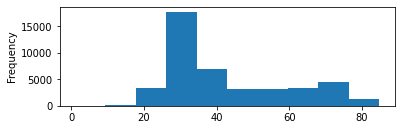

In [239]:
# Add first subplot
plt.subplot(2, 1, 1)
gapminder_melt.life_expectancy.plot(kind='hist')

In [240]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

In [241]:
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

In [242]:
gapminder_agg.tail()

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64

<AxesSubplot:xlabel='year'>

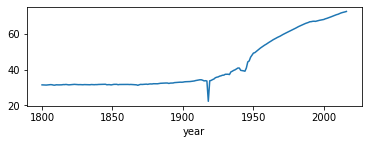

In [243]:
# Add second subplot
plt.subplot(2, 1, 2)
gapminder_agg.plot(kind='line')

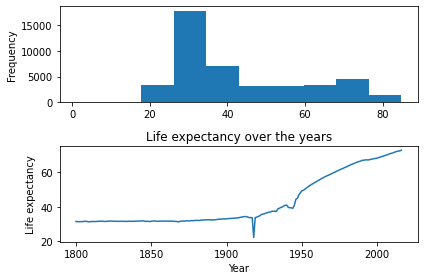

In [244]:
# Add first subplot
plt.subplot(2, 1, 1)
gapminder_melt.life_expectancy.plot(kind='hist')

# Add second subplot
plt.subplot(2, 1, 2)
gapminder_agg.plot(kind='line')

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [245]:
gapminder_agg.to_csv(r'data/gapminder_agg.csv')
gapminder_melt.to_csv(r'data/gapminder_tidy.csv')

#### Amazing work! You've stepped through each stage of the data cleaning process and your data is now ready for serious analysis! Looking at the line plot, it seems like life expectancy has, as expected, increased over the years. There is a surprising dip around 1920 that may be worth further investigation!

In [246]:
gapminder_melt

,country,year,life_expectancy
1,Afghanistan,1800,28.21
3,Albania,1800,35.40
4,Algeria,1800,28.82
7,Angola,1800,26.98
9,Antigua and Barbuda,1800,33.54
...,...,...,...
169251,Virgin Islands (U.S.),2016,80.82
169254,Yemen,2016,64.92
169256,Zambia,2016,57.10
169257,Zimbabwe,2016,61.69


In [247]:
gapminder_agg

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
1805    31.562537
1806    31.615970
1807    31.573134
1808    31.376766
1809    31.310448
1810    31.521741
1811    31.481891
1812    31.472736
1813    31.467214
1814    31.516318
1815    31.647413
1816    31.627512
1817    31.721542
1818    31.574726
1819    31.488607
1820    31.560796
1821    31.620597
1822    31.722090
1823    31.770647
1824    31.709005
1825    31.666816
1826    31.597313
1827    31.633582
1828    31.577861
1829    31.559950
1830    31.640100
1831    31.604776
1832    31.569204
1833    31.564328
1834    31.551990
1835    31.674428
1836    31.640697
1837    31.580647
1838    31.641294
1839    31.631741
1840    31.714229
1841    31.729602
1842    31.734179
1843    31.719104
1844    31.778109
1845    31.825473
1846    31.547164
1847    31.619005
1848    31.616716
1849    31.466070
1850    31.635721
1851    31.772985
1852    31.785821
1853    31.784627
1854    31.573085
1855 